# Experiments with likelihood function

Use simple data, and see what happens.

Let's start with something really simple, eg 1 feature, etc.

In [91]:
import numpy as np
import math


A = np.array([
    [1],
    [-1]
])

X = np.array([
    [1],
    [-1]
])

def print_score_Z(X, Z, sigma_X, sigma_A, print_fn=print):
    print_fn('==========')
    ZTZI = Z.T.dot(Z) + (sigma_X * sigma_X / sigma_A / sigma_A) * np.identity(Z.shape[1])
    print_fn('ZTZI', ZTZI)
    ZTZIInv = np.linalg.inv(ZTZI)
    print_fn('ZTZIInv', ZTZIInv)
    IZZZIZ = np.identity(Z.shape[0]) - Z.dot(ZTZIInv).dot(Z.T)
    print_fn('IZZZIZ\n', IZZZIZ)
    XT___X = X.T.dot(IZZZIZ).dot(X)
    print_fn('XT___X\n', XT___X)
    trace_term = np.trace(XT___X)
    print_fn('trace_term', trace_term)
    exponent = - 1 / (sigma_X * sigma_X * 2) * trace_term
    print_fn('exponent', exponent)
    score = np.exp(exponent)
    print_fn('score', score)
    return score


print_score_Z(X=X, Z=np.array([
    [1, 0],
    [0, 1]
]), sigma_X=0.5, sigma_A=1.0)

print_score_Z(X=X, Z=np.array([
    [0, 1],
    [1, 0]
]), sigma_X=0.5, sigma_A=1.0)

print_score_Z(X=X, Z=np.array([
    [0, 0],
    [0, 0]
]), sigma_X=0.5, sigma_A=1.0)

print_score_Z(X=X, Z=np.array([
    [1, 1],
    [1, 1]
]), sigma_X=0.5, sigma_A=1.0)

def dec_to_array(dec, rows, cols):
    # so, dec is basically going to
    # be convered into binary, then
    # written into the array

    dec_str = format(dec, '04b')
    val_array = [int(v) for v in dec_str]
    res = np.array(val_array, dtype=np.float32).reshape(rows, cols)
    return res


def null_print(*args):
    pass

probs = np.zeros(16)
for Z_dec in range(16):
    Z = dec_to_array(Z_dec, 2, 2)
    probs[Z_dec] = print_score_Z(Z=Z, X=X, sigma_X=0.5, sigma_A=0.5, print_fn=null_print)

# normalize
probs /= np.sum(probs)
print('')
print('Z    P(X | Z)')
for Z_dec in range(16):
    Z_binstr = format(Z_dec, '04b')
#     print(Z_binstr, probs[Z_dec])
    print(Z_binstr[:2] + '  ', int(probs[Z_dec] * 80) * '|')
    print(Z_binstr[2:])
    print('')

ZTZI [[ 1.25  0.  ]
 [ 0.    1.25]]
ZTZIInv [[ 0.8  0. ]
 [ 0.   0.8]]
IZZZIZ
 [[ 0.2  0. ]
 [ 0.   0.2]]
XT___X
 [[ 0.4]]
trace_term 0.4
exponent -0.8
score 0.449328964117
ZTZI [[ 1.25  0.  ]
 [ 0.    1.25]]
ZTZIInv [[ 0.8  0. ]
 [ 0.   0.8]]
IZZZIZ
 [[ 0.2  0. ]
 [ 0.   0.2]]
XT___X
 [[ 0.4]]
trace_term 0.4
exponent -0.8
score 0.449328964117
ZTZI [[ 0.25  0.  ]
 [ 0.    0.25]]
ZTZIInv [[ 4.  0.]
 [ 0.  4.]]
IZZZIZ
 [[ 1.  0.]
 [ 0.  1.]]
XT___X
 [[ 2.]]
trace_term 2.0
exponent -4.0
score 0.0183156388887
ZTZI [[ 2.25  2.  ]
 [ 2.    2.25]]
ZTZIInv [[ 2.11764706 -1.88235294]
 [-1.88235294  2.11764706]]
IZZZIZ
 [[ 0.52941176 -0.47058824]
 [-0.47058824  0.52941176]]
XT___X
 [[ 2.]]
trace_term 2.0
exponent -4.0
score 0.0183156388887

Z    P(X | Z)
00   |
00

00   ||||
01

00   ||||
10

00   ||||||
11

01   ||||
00

01   |
01

01   |||||||||||
10

01   |||||
11

10   ||||
00

10   |||||||||||
01

10   |
10

10   |||||
11

11   ||||||
00

11   |||||
01

11   |||||
10

11   |
11



I couldnt see how to go further than this, without learning a bit more about what are projections, what characteristics do projections have, and so on.

## Projection

After Googling a bit, for projections, I found https://ocw.mit.edu/courses/mathematics/18-06sc-linear-algebra-fall-2011/least-squares-determinants-and-eigenvalues/projections-onto-subspaces/MIT18_06SCF11_Ses2.2sum.pdf  Here are my notes from going through that.

The vector equation for the length of the projection of a vector $\mathbf{b}$ onto the vector $\mathbf{a}$, and where the length is $x$:

$$
\mathbf{a}^T (\mathbf{b} - x\mathbf{a}) = 0
$$

Therefore,

$$
x\mathbf{a}^T\mathbf{a} = \mathbf{a}^T \mathbf{b}
$$
&nbsp;

So:

$$
x = \frac{\mathbf{a}^T \mathbf{b}}
   {\mathbf{a}^T\mathbf{a}}
$$

Since $\mathbf{a}^T \mathbf{b} = \lvert\mathbf{a}\rvert \lvert\mathbf{b}\rvert \cos \theta$, so:

$$
x = \frac{\lvert\mathbf{a}\rvert \lvert\mathbf{b}\rvert \cos \theta}
  {\lvert\mathbf{a}\rvert \lvert\mathbf{a}\rvert}
$$
&nbsp;

$$
= \frac{ \lvert\mathbf{b}\rvert \cos \theta}
  { \lvert\mathbf{a}\rvert}
$$

So,
$$
\mathbf{p} = \frac{ \lvert\mathbf{b}\rvert \cos \theta}
  { \lvert\mathbf{a}\rvert} \mathbf{a}
$$

Or, expressed as the dot products:

$$
\mathbf{p} = \frac{\mathbf{a}^T\mathbf{b}\mathbf{a}}{\mathbf{a}^T\mathbf{a}}
$$


If we want a projection matrix $\mathbf{P}$, where $\mathbf{p} = \mathbf{P}\mathbf{b}$

Let's write the earlier expression in this form:

$$
\frac{\mathbf{a}^T\mathbf{b}\mathbf{a}}{\mathbf{a}^T\mathbf{a}}
$$
&nbsp;

$$
\frac{\mathbf{a}\mathbf{a}^T\mathbf{b}}{\mathbf{a}^T\mathbf{a}}
$$

So:

$$
\mathbf{P}
=
\frac{\mathbf{a}\mathbf{a}^T}{\mathbf{a}^T\mathbf{a}}
$$



Lets try some examples:

Create a vector $\mathbf{a}$ and $\mathbf{b}$, and plot them:

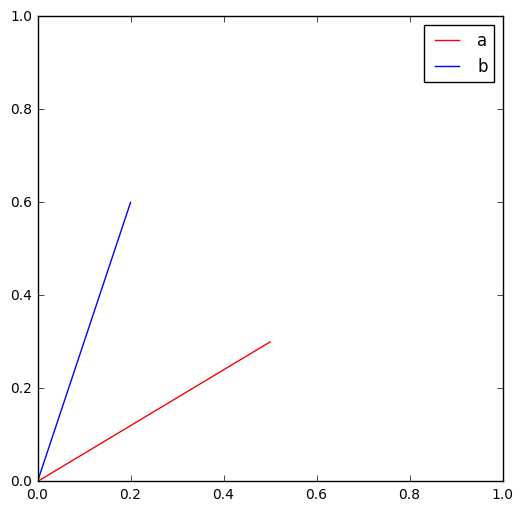

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import math


def plot_vector(start, end, formatstr=None, **kwargs):
    line = np.zeros((2, 2))
    line[0] = start
    line[1] = end
    if formatstr is None:
        plt.plot(line[:, 0], line[:, 1], **kwargs)
    else:
        plt.plot(line[:, 0], line[:, 1], formatstr, **kwargs)
    

zerov = np.array([0, 0])
av = np.array([0.5, 0.3])
bv = np.array([0.2, 0.6])

plt.clf()
plt.figure(figsize=(6, 6))
plot_vector(zerov, av, 'r', label='a')
plot_vector(zerov, bv, 'b', label='b')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()

Calculate the projection, $\mathbf{p}$, plot that:

aTa [[ 0.34]]
aaT [[ 0.25  0.15]
 [ 0.15  0.09]]
np.sum(np.power(a, 2)) 0.34
sqrt(np.sum(np.power(a, 2)) 0.583095189485
P [[ 0.73529412  0.44117647]
 [ 0.44117647  0.26470588]]
p [[ 0.41176471]
 [ 0.24705882]]
pv [ 0.41176471  0.24705882]


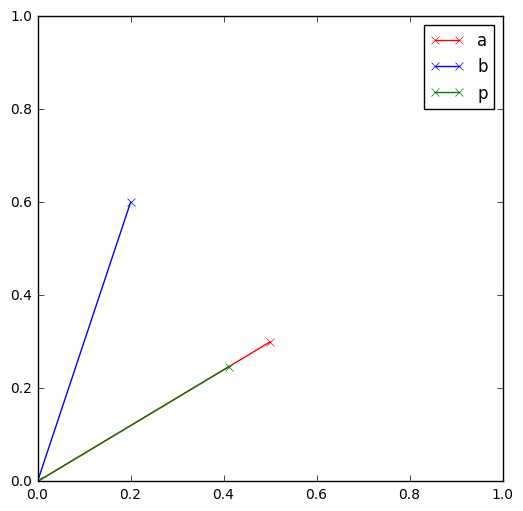

In [13]:
a = av.reshape(-1, 1)
b = bv.reshape(-1, 1)


print('aTa', a.T.dot(a))
print('aaT', a.dot(a.T))
print('np.sum(np.power(a, 2))', np.sum(np.power(a, 2)))
print('sqrt(np.sum(np.power(a, 2))', np.sqrt(np.sum(np.power(a, 2))))

P = a.dot(a.T) / a.T.dot(a)
print('P', P)

p = P.dot(b)
print('p', p)
pv = p.reshape(-1)
print('pv', pv)
plt.clf()
plt.figure(figsize=(6, 6))
plt.xlim(0, 1)
plt.ylim(0, 1)
plot_vector(zerov, av, 'r-x', label='a')
plot_vector(zerov, bv, 'b-x', label='b')
plot_vector(zerov, pv, 'g-x', label='p')
plt.legend()
plt.show()

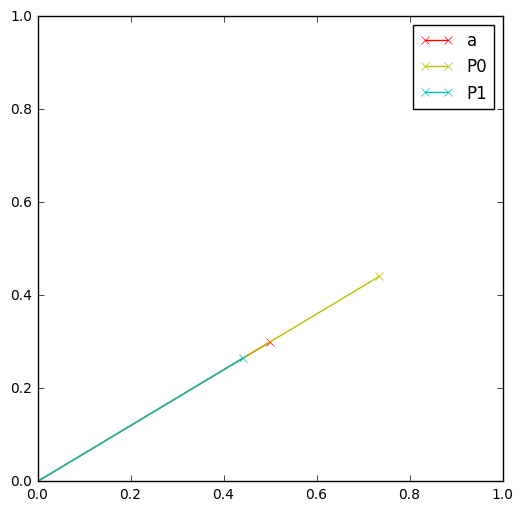

In [14]:
plt.clf()
plt.figure(figsize=(6, 6))
plt.xlim(0, 1)
plt.ylim(0, 1)
plot_vector(zerov, av, 'r-x', label='a')
plot_vector(zerov, P[:, 0], 'y-x', label='P0')
plot_vector(zerov, P[:, 1], 'c-x', label='P1')
plt.legend()
plt.show()


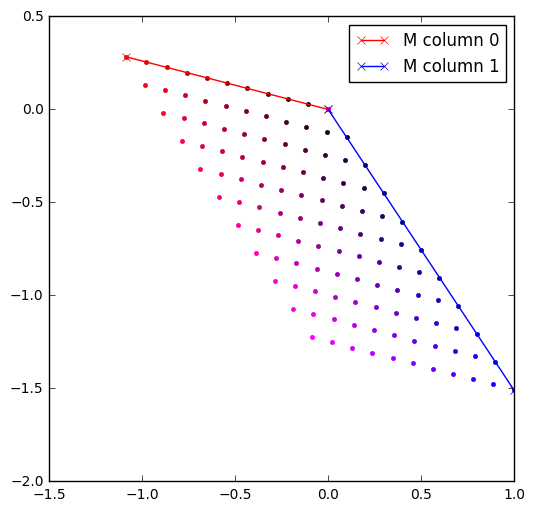

In [15]:
"""
Examine column space of an arbitrary matrix
"""
import matplotlib.pyplot as plt
import numpy as np

def run():
    np.random.seed(123)
    M = np.random.randn(2, 2)

    plt.clf()
    plt.figure(figsize=(6, 6))
    for i in np.arange(0, 1.1, 0.1):
        for j in np.arange(0, 1.1, 0.1):
            bv = np.array([i, j])
            b = bv.reshape(-1, 1)
            p = M.dot(b)
            plot_vector(zerov, p.reshape(-1), '.', c=(i, 0, j))
    plot_vector(zerov, M[:, 0], 'r-x', label='M column 0')
    plot_vector(zerov, M[:, 1], 'b-x', label='M column 1')
    plt.plot()
    plt.legend()
    plt.show()
run()

$$
\mathbf{p} = \mathbf{P} \mathbf{x}
$$
&nbsp;

$$
\begin{bmatrix}
p_0 \\
p_1 \\
\end{bmatrix}
=
\begin{bmatrix}
P_{00} & P_{01} \\
P_{10} & P_{11} \\
\end{bmatrix}
\begin{bmatrix}
b_{0} \\
b_{1} \\
\end{bmatrix}
$$
&nbsp;


So:
$$
\begin{bmatrix}
p_0 \\
p_1 \\
\end{bmatrix}
=
\begin{bmatrix}
P_{00}b_{0} + P_{01}b_1 \\
P_{10}b_{0} + P_{11}b_1 \\
\end{bmatrix}
$$
&nbsp;

$$
=
b_0 \mathbf{p}_0
+
b_1 \mathbf{p}_1
$$
...where $p_m$ is $m$th column of $\mathbf{P}$

Try some examples of $\mathbf{a}$ vectors.  We'll rotate $\mathbf{a}$ around, in a circle, whilst keeping its length 0 (so we dont have do divide by the dot product of $\mathbf{a}$ with itself, ie by the square of the length):

[[ 1.  0.]
 [ 0.  0.]]


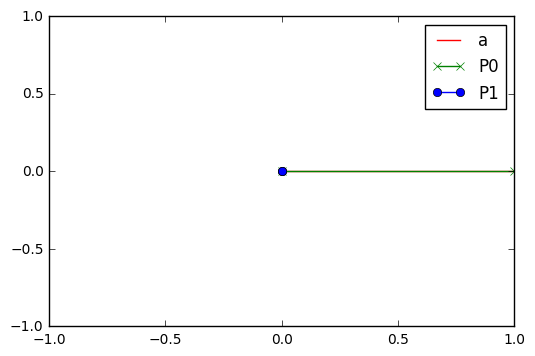

[[ 0.75       0.4330127]
 [ 0.4330127  0.25     ]]


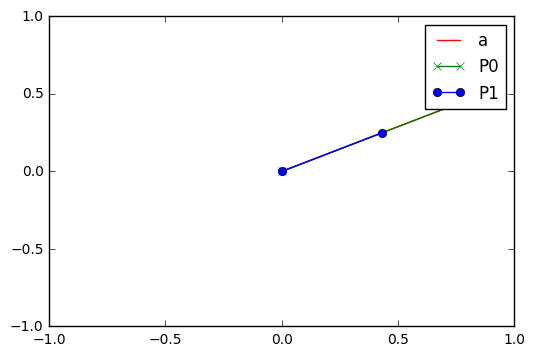

[[ 0.25       0.4330127]
 [ 0.4330127  0.75     ]]


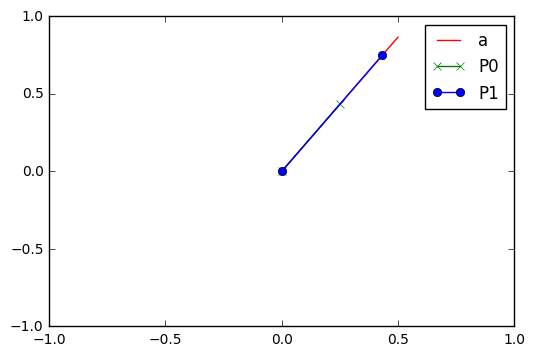

[[  3.74939946e-33   6.12323400e-17]
 [  6.12323400e-17   1.00000000e+00]]


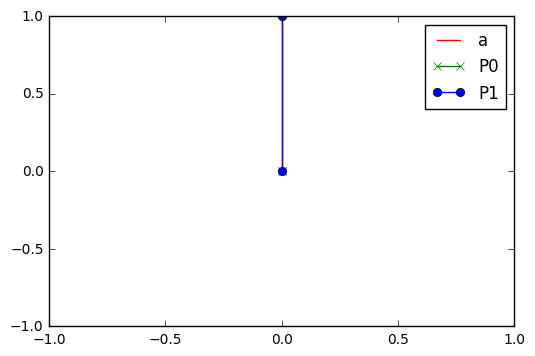

[[ 0.25      -0.4330127]
 [-0.4330127  0.75     ]]


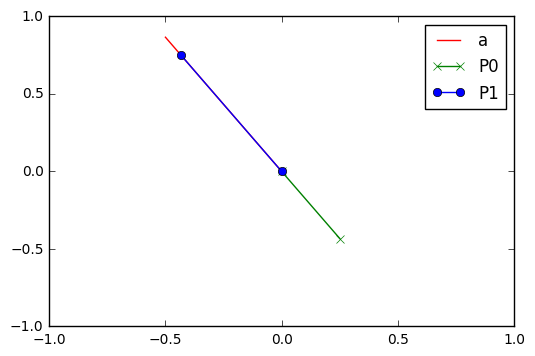

[[ 0.75      -0.4330127]
 [-0.4330127  0.25     ]]


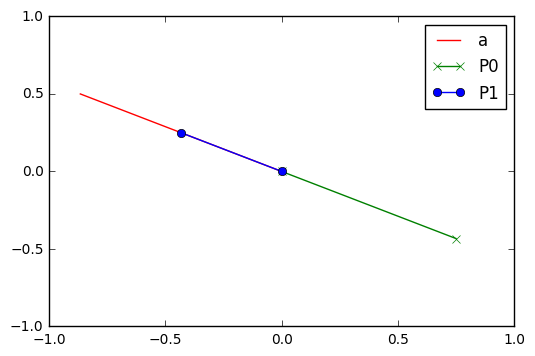

[[  1.00000000e+00  -1.22464680e-16]
 [ -1.22464680e-16   1.49975978e-32]]


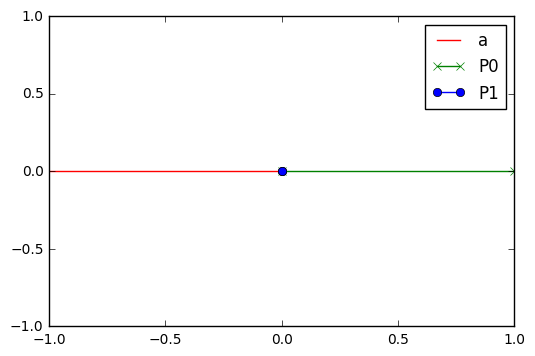

[[ 0.75       0.4330127]
 [ 0.4330127  0.25     ]]


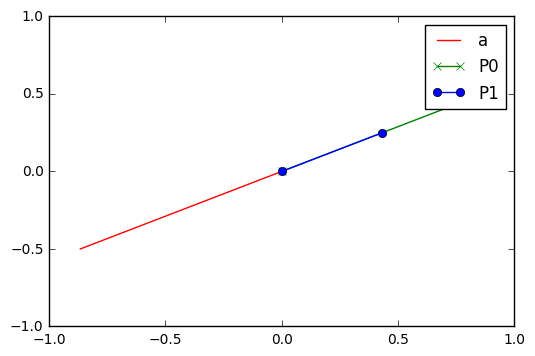

[[ 0.25       0.4330127]
 [ 0.4330127  0.75     ]]


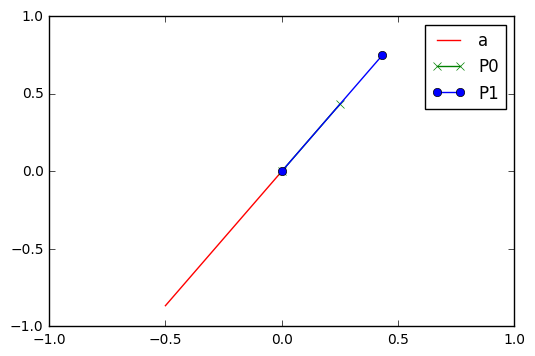

[[  3.37445951e-32   1.83697020e-16]
 [  1.83697020e-16   1.00000000e+00]]


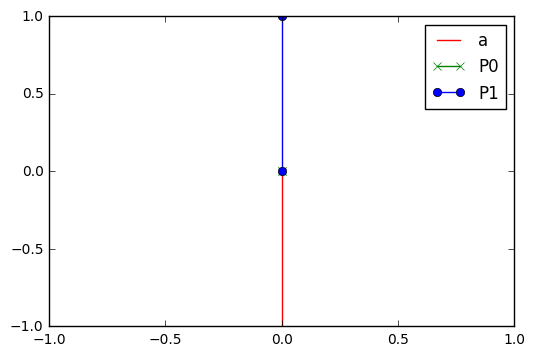

[[ 0.25      -0.4330127]
 [-0.4330127  0.75     ]]


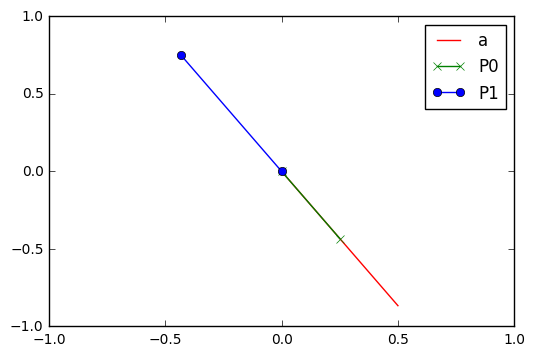

[[ 0.75      -0.4330127]
 [-0.4330127  0.25     ]]


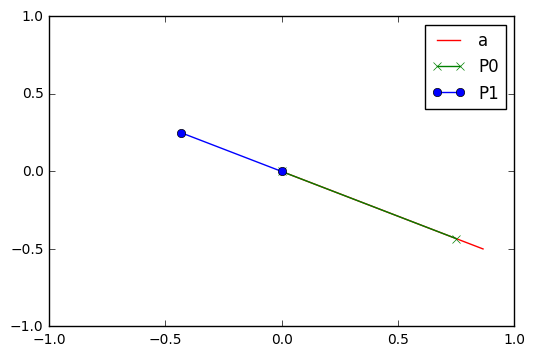

In [42]:
import numpy as np
import matplotlib.pyplot as plt


def project(a):
    P = a.dot(a.T)
    print('')
    print(a)
    print(P)

# try different angles of unit vector a:
# plt.figure
i = 0
for angle in range(0, 360, 30):
    col = i % 4
    row = i // 4 
#     plt.subplot(4, 4, i + 1)
    angle_rad = angle / 180 * math.pi
    av = np.array([
        math.cos(angle_rad),
        math.sin(angle_rad)
    ])
#     print('av', av)
    a = av.reshape(-1, 1)
#     project(av.reshape(-1, 1))
    P = a.dot(a.T)
    print(P)
    plot_vector(zerov, av, 'r-', label='a')
    plot_vector(zerov, P[:, 0], 'g-x', label='P0')
    plot_vector(zerov, P[:, 1], 'b-o', label='P1')
    plt.ylim(-1, 1)
    plt.xlim(-1, 1)
    plt.legend()
    plt.show()
    i += 1

Thinking about what happens when we multiply $\mathbf{a}$ by $\mathbf{a}^T$, we have:

$$
\begin{bmatrix}
\mathbf{a}
\end{bmatrix}
\begin{bmatrix}
\mathbf{a}^T \\
\end{bmatrix}
$$

Which is:
$$
\begin{bmatrix}
\mathbf{a}
\end{bmatrix}
\begin{bmatrix}
a_0 & a_1 \\
\end{bmatrix}
$$

Or:

$$
\begin{bmatrix}
a_0a_0 & a_0a_1 \\
a_0a_1 & a_1a_1 \\
\end{bmatrix}
$$

So the result is:

$$
\begin{bmatrix}
a_0\mathbf{a} & a_1\mathbf{a} \\
\end{bmatrix}
$$

... so each of the columns is the original vector $\mathbf{a}$, multiplied by one of the coefficients of $\mathbf{a}$.  So:

- each column vector will be colinear with $\mathbf{a}$
- columns corresponding to numerically greater coefficients will be numerically larger, and visa versa

This corresponds to the results above, in the graphs of rotating the vector $\mathbf{a}$, above.